# Проект "Выбор локаций для скважин"

## 1. Загрузка и подготовка данных
### 1.1 Чтение данных 

Импорт библиотек

In [61]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

sns.set_style(style='darkgrid')
pd.set_option('precision', 3)

Чтение данных о геологоразведке трёх регионах

In [62]:
region_1 = pd.read_csv('.\datasets\geo_data_0.csv')
region_2 = pd.read_csv('.\datasets\geo_data_1.csv')
region_3 = pd.read_csv('.\datasets\geo_data_2.csv')

region_list = [region_1, region_2, region_3]

Функция, выводящая основную информацию о датафрейме

In [63]:
def show_main_info(data, info=True, describe=True, head=False, isna=False, dupl=False):
    
    if info:
        # выводит информацию о датафрейме
        print('\n\u001b[4m\u001b[1mОсновная информация о датафрейме\u001b[0m\n')
        print(data.info())

    if describe:
        # выводит основные описательные характеристики
        print('\n\u001b[4m\u001b[1mОсновные описательные характеристики датафрейма\u001b[0m')
        display(data.describe())

    if head:
        # выводит первые 5 строк
        print('\n\u001b[4m\u001b[1mПервые 5 строк датафрейме\u001b[0m')
        display(data.head())

    if isna:
        # проверяет наличие пустых ячеек
        print('\n\u001b[4m\u001b[1mКоличество пропущенных значений в столбцах датафрейма\u001b[0m')
        display(data.isna().sum())

    if dupl:
        # проверяет наличие явных дуликатов
        print('\n\u001b[4m\u001b[1mКоличество дубликатов в столбце "id" датафрейма равно:\u001b[0m {}\n'.format(
        data.duplicated().sum()))

### 1.2 Предварительный анализ датафреймов

Для предварительного анализа используется созданная функция "show_main_info" и библиотекой pandas_profiling

#### 1.2.1 Первый регион

profile_r1 = ProfileReport(region_1, title="Report of Region 1", progress_bar=False)
profile_r1.to_notebook_iframe()

In [64]:
show_main_info(region_1)


Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Основные описательные характеристики датафрейма


,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,0.500,0.250,2.503,92.500
std,0.872,0.504,3.248,44.289
min,-1.409,-0.848,-12.088,0.000
25%,-0.073,-0.201,0.288,56.498
50%,0.502,0.250,2.516,91.850
75%,1.074,0.701,4.715,128.564
max,2.362,1.344,16.004,185.364


#### 1.2.2 Второй регион

profile_r2 = ProfileReport(region_2, title="Report of Region 2", progress_bar=False)
profile_r2.to_notebook_iframe()

In [65]:
show_main_info(region_2)


Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Основные описательные характеристики датафрейма


,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,1.141,-4.797,2.495,68.825
std,8.966,5.120,1.704,45.944
min,-31.610,-26.359,-0.018,0.000
25%,-6.299,-8.268,1.000,26.953
50%,1.153,-4.813,2.011,57.086
75%,8.621,-1.333,4.000,107.813
max,29.422,18.734,5.020,137.945


#### 1.2.3 Третий регион

profile_r3 = ProfileReport(region_3, title="Report of Region 3", progress_bar=False)
profile_r3.to_notebook_iframe()

In [66]:
show_main_info(region_3)


Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Основные описательные характеристики датафрейма


,f0,f1,f2,product
count,100000.000,100000.000,100000.000,100000.000
mean,0.002,-0.002,2.495,95.000
std,1.732,1.730,3.473,44.750
min,-8.760,-7.084,-11.970,0.000
25%,-1.162,-1.175,0.130,59.450
50%,0.009,-0.009,2.484,94.926
75%,1.159,1.164,4.859,130.595
max,7.238,7.845,16.739,190.030


### 1.3 Вывод:

По итогам предварительного анализа даннымых видно следующее:

* Наибольшее среднее значения и медиана тыс. баррелей продукта находятся в третьем датасете. Наименьшее значение во втором датасете;
* В датасетах первого, второго и третьего регионов пропущенных значений и дубликатов не обнаружено;
* Масштабирование значений независимых и целевых признаков не требуется.

## 2. Обучение и проверка модели

### 2.1 Определение функций

Функция для предобработки данных

In [67]:
def model_preporation(data):
    
    # разделяем исходный датасет на датасеты с неизменяемыми и целевым признаками
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    
    # создаем тренировочные и валидационные датасеты
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=14)
    
    return X_train, X_valid, y_train, y_valid

Функция для представления результата работы модели

In [68]:
def model_result(prediction, y_valid, text_out=False):
    
    # считаем стандартную ошибку 
    RMSE = mean_squared_error(prediction, y_valid, squared=False)
    mean = prediction.mean()
    
    # выводим информацию на экран
    if text_out: 
        print(f'Значение стандартной ошибки RMSE модели для данного региона равно {RMSE.round(3)} тыс. баррелей.')
        print(f'Средний запас сырья данного региона равен {mean.round(3)} тыс. баррелей.')
    
    return RMSE, mean

Функция обучения линейной регрессии

In [69]:
def get_res_linear_regres(X_train, X_valid, y_train, y_valid):
    
    # применение функции model_preporation
    #X_train, X_valid, y_train, y_valid = model_preporation(region)

    # обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_valid)

    # применение функции model_result
    RMSE, mean = model_result(prediction, y_valid)
    return RMSE, mean, prediction

### 2.2 Обучение моделей

Обучение модели линейной регрессии и вывод значений стандартного отклонения и средний запас предсказанного сырья

In [70]:
# применение функции model_preporation
X_train_1, X_valid_1, y_train_1, y_valid_1 = model_preporation(region_1)
X_train_2, X_valid_2, y_train_2, y_valid_2 = model_preporation(region_2)
X_train_3, X_valid_3, y_train_3, y_valid_3 = model_preporation(region_3)

# применение функции get_res_linear_regres
RMSE_1, mean_1, prediction_1 = get_res_linear_regres(X_train_1, X_valid_1, y_train_1, y_valid_1)
RMSE_2, mean_2, prediction_2 = get_res_linear_regres(X_train_2, X_valid_2, y_train_2, y_valid_2)
RMSE_3, mean_3, prediction_3 = get_res_linear_regres(X_train_3, X_valid_3, y_train_3, y_valid_3)

Создание датафрейма с результатами обучения моделей и построение графиков визуализации данных значений

In [71]:
df_regions = pd.DataFrame({'Метрика качества RMSE':[RMSE_1, RMSE_2, RMSE_3],
                           'Средний запас сырья':[mean_1, mean_2, mean_3]},
                          index=['Регион 1', 'Регион 2', 'Регион 3'])
df_regions

,Метрика качества RMSE,Средний запас сырья
Регион 1,37.642,92.563
Регион 2,0.893,68.895
Регион 3,39.825,95.042


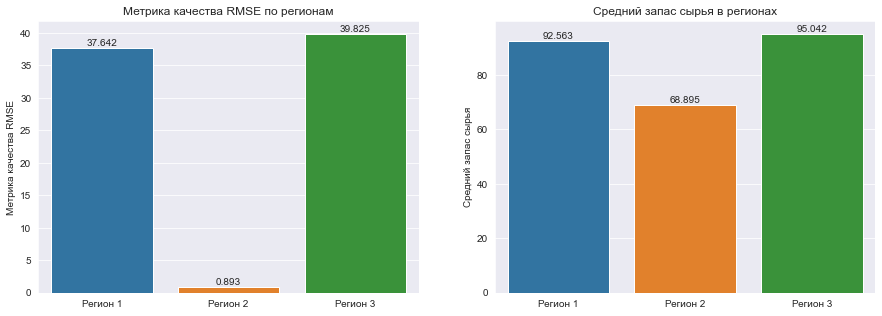

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=df_regions['Метрика качества RMSE'].index, y=df_regions['Метрика качества RMSE'], ax=ax[0])
sns.barplot(x=df_regions['Средний запас сырья'].index, y=df_regions['Средний запас сырья'], ax=ax[1])


ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[1].bar_label(ax[1].containers[0], fmt='%.3f')
ax[0].set_title('Метрика качества RMSE по регионам')
ax[1].set_title('Средний запас сырья в регионах')
plt.show()

### 2.3 Вывод

Из результатов предсказаний моделей Линейной регрессии на данных трех регионов получилось следующее:

* Наибольшее значение среднего запас сырья имеет третий регион - 95.042 тыс. баррелей;
* Наибольшее значение стандартной ошибки имеет третий регион - 39.825 тыс. баррелей;
* Наименьшее значение среднего запас сырья имеет второй регион - 68.895 тыс. баррелей; 
* Наименьшее значение стандартной ошибки имеет второй регион - 0.893 тыс. баррелей;
* Средний запас сырья и значение стандартной ошибки во втором регионе сильно отличаются от первого и третьего регионов.

## 3. Подготовка к расчёту прибыли

Основная информацию для расчета прибыли от скважен

In [73]:
WELLS_BUDGET = 10e9 #доступный бюджет для разработки скважин в регионе
ONE_BARREL_PRICE = 450 #стоимость одного барреля
BARRELS_PROFIT = ONE_BARREL_PRICE * 1000 #доход с одной тысячи баррелей

Рассчёт минимального необходимого запаса скважин. Сравнение минимального запаса с предсказанными средними значениями запасов скважин первого, второго и третьего регионов.

In [74]:
#расчет минимального необходимого запаса сырья скважин в регионе для её окупаемости
# с учётом того, что в регионах разрабатываются только 200 лучших скважин
min_necessary_stock = round(WELLS_BUDGET / (BARRELS_PROFIT * 200), 3)

#сравнение минимального необходимого запаса со значениями, предсказанными моделями
compare_1, compare_2, compare_3 = [round(x / min_necessary_stock, 3) for x in [mean_1, mean_2, mean_3]]

print(f'Минимальный необходимый запас скаважины для ее окупаемости равен {min_necessary_stock} тыс. баррелей\n')

Минимальный необходимый запас скаважины для ее окупаемости равен 111.111 тыс. баррелей



График полученных значений

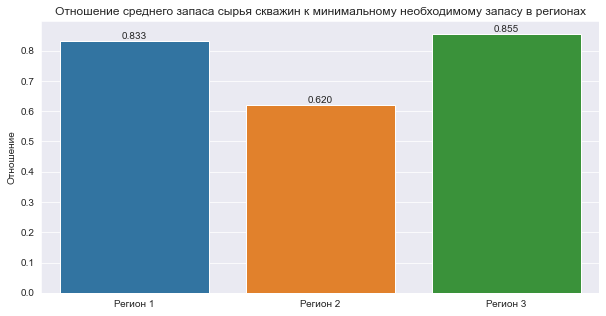

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x=['Регион 1', 'Регион 2', 'Регион 3'], y=[compare_1, compare_2, compare_3])

ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title('Отношение среднего запаса сырья скважин к минимальному необходимому запасу в регионах')
plt.ylabel('Отношение')
plt.show()

### Вывод

Из проведенного расчета видно, что средние запасы сырья скважин первого и третьего регионов близок к необходимому для окупаемости запасу. Средние запасы сырья скважин второго региона имеет меньшее значение чем первый и третьей регионы. Его среднее значение меньше необходимого для окупаемости значения запаса сырья.

## 4. Расчёт прибыли и рисков 

### 4.1 Расчёт прибыли в регионах

Для расчета прибыли и рисков зададим дополнительную информацию о количестве разрабатываемых скважен и максимально допустимую вероятность убытка.

In [76]:
BEST_POINT_AMOUNT= 200 #количество наилучших скважен, необходимых для исследования
LOSS_PROBABILITY= 0.025 #максимально допустимая вероятность убытка

Создадим функцию, которая из датафрейма с предсказаниями отберет необходимое количество скважен с наибольшим значениям объема сырья. Используя индексы отобранных скважен получим реально имеющийся объем сырья в этих скваженах из валидационных выборок.

In [77]:
def choice_function(y_valid, prediction, choice_amount):
    
    #создадим датафрейм из данными, предсказанных ML модели. Отсортируем по убыванию и отберем необходимый диапазон
    prediction_index = (pd.Series(prediction, index=y_valid.index)
                        .sort_values(ascending=False)
                        .index)
    
    #из исходного датафрейма отбираем строки с индексами, которые соответствуют индексам данных в датафрейме prediction 
    #с наибольшими значениями таргета
    choiced_data = y_valid.loc[prediction_index].iloc[:choice_amount]
    
    return choiced_data

Создадим функцию, которая отберет 200 скважен, по предсказаниям ML-модели содержащих наибольшее количество сырья. Посчитаем возможную прибыль с каждой скважины. Посчитаем суммарный объем запасов сырья этих скважен, суммарную возможную прибыль, валовую прибыль и валовую маржинальность.

In [78]:
def income_counter(input_data, input_prediction, cost=BARRELS_PROFIT, choice_amount=BEST_POINT_AMOUNT, well_cost=WELLS_BUDGET, info=False):
    data = input_data.copy()
    prediction = input_prediction.copy()
    
    #используем функцию отбора скважен
    choiced_stock = choice_function(data, prediction, choice_amount)
    
    #создаем итоговый датафрейм
    best_data = pd.DataFrame({'wells_stock': choiced_stock})
    
    #считаем доход с каждой скважины
    best_data['income_from_well'] = best_data['wells_stock'] * cost
    
    # обновляем индексы
    #best_data.reset_index(drop=True, inplace=True)           
    
    #считаем суммарный объем и возможный доход
    sum_stock = best_data['wells_stock'].sum().round(3)
    sum_income = best_data['income_from_well'].sum()

    #считаем валовый доход и валовую маржинальность
    if well_cost != 0:
        gross_profit = sum_income - well_cost
        gross_margin = gross_profit / sum_income
    
    # вывод посчитанных значений на экран при необходимости
    if info:
        print(f'Суммарное значение объема сырья отобранных скважен равно {sum_stock} тыс. барралей')
        print(f'Суммарный возможный доход с отобранных скважен равен {round(sum_income / 1e9, 3)} млрд.')
        print(f'Суммарный возможный валовый доход с отобранных скважен равен {round(gross_profit / 1e9, 3)} млрд.')
        print(f'Возможная валовая маржинальность с отобранных скважен равна {gross_margin.round(3)}')

    return best_data, sum_stock, sum_income, gross_profit

Применим данную функцию к первому, второму и третьему регионам и выведем интересующую информацию. Выведем первые строки полученных датафреймов. 

#### 4.1.1 Расчеты для первого региона

In [79]:
df_reg1, sum_stock_reg1, sum_income_reg1, sum_gross_profit_reg1 = income_counter(y_valid_1, prediction_1)
df_reg1.head()

,wells_stock,income_from_well
83095,144.009,6.480e+07
27658,140.632,6.328e+07
78948,162.153,7.297e+07
65743,176.808,7.956e+07
93716,130.986,5.894e+07


#### 4.1.2 Расчеты для второго региона

In [80]:
df_reg2, sum_stock_reg2, sum_income_reg2, sum_gross_profit_reg2 = income_counter(y_valid_2, prediction_2)
df_reg2.head()

,wells_stock,income_from_well
42738,137.945,6.208e+07
19483,137.945,6.208e+07
60464,137.945,6.208e+07
42432,137.945,6.208e+07
2242,137.945,6.208e+07


#### 4.1.3 Расчеты для третьего региона

In [81]:
df_reg3, sum_stock_reg3, sum_income_reg3, sum_gross_profit_reg3 = income_counter(y_valid_3, prediction_3)
df_reg3.head()

,wells_stock,income_from_well
3540,154.063,6.933e+07
98714,98.664,4.440e+07
6647,152.294,6.853e+07
69502,121.349,5.461e+07
41820,139.563,6.280e+07


#### 4.1.4 График полученных значений по трем регионам

Для визуального сравнения полученных значений в трех регионах построим графики.

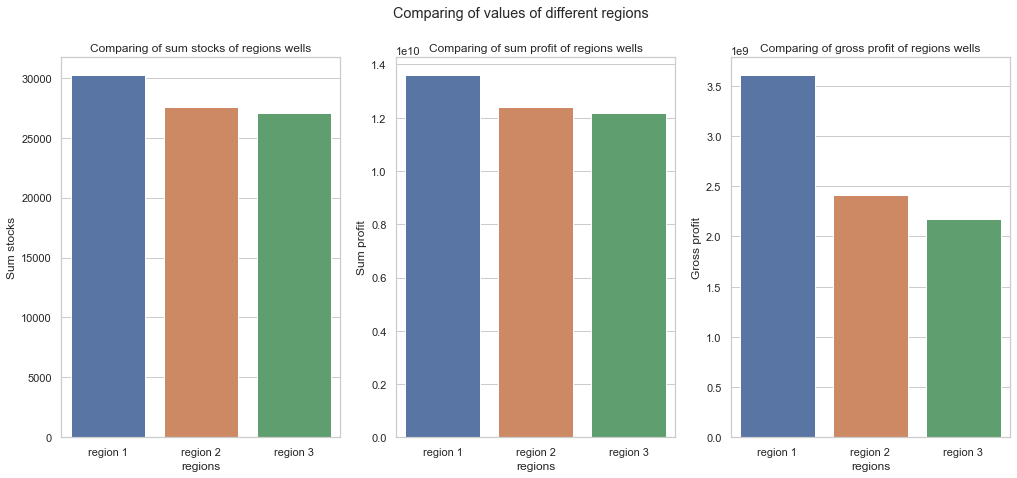

In [83]:
data_plot = pd.DataFrame({
    'regions':['region 1', 'region 2','region 3'],
    'sum_stock':[sum_stock_reg1, sum_stock_reg2, sum_stock_reg3],
    'sum_income':[sum_income_reg1, sum_income_reg2, sum_income_reg3],
    'sum_gross_profit':[sum_gross_profit_reg1, sum_gross_profit_reg2, sum_gross_profit_reg3]},
)

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(17, 7))

fig.suptitle('Comparing of values of different regions')

sns.barplot(ax=axes[0], data=data_plot, x='regions', y='sum_stock')
sns.barplot(ax=axes[1], data=data_plot, x='regions', y='sum_income')
sns.barplot(ax=axes[2], data=data_plot, x='regions', y='sum_gross_profit')

axes[0].set_title('Comparing of sum stocks of regions wells')
axes[1].set_title('Comparing of sum profit of regions wells')
axes[2].set_title('Comparing of gross profit of regions wells')

axes[0].set_ylabel('Sum stocks')
axes[1].set_ylabel('Sum profit')
axes[2].set_ylabel('Gross profit')

plt.show()

#### 4.1.5 Вывод:

При рассмотрении 200 скважин с наибольшим объемом сырья получается, что наибольший объем сырья и наибольший валовый доход имеет первый регион. Наименьшие значения данных показателей имеет третий регион.

### 4.2 Расчёт рисков в регионах

Для расчета рисков создадим функцию, которая с помощью метода bootstrap сделает 1000 выборок и найдет суммарный доход в каждой выборке. После чего посчитаем 95% доверительный интервал. Посчитаем вероятность убытков, то есть отношение не окупившихся выборок к окупившимся.

In [108]:
def bootstrap_model(y_valid, ml_prediction, total_amount, best_amount, cost=BARRELS_PROFIT, loss_border=WELLS_BUDGET, n_bootstrap=1000):
    # зададем переменные
    state = np.random.RandomState(12345)
    data = y_valid.copy()
    prediction = pd.Series(ml_prediction.copy(), index=y_valid.index)
    
    # создадим список для bootstrap
    bootstrap_sum_list = []
    
    # применим метод bootstrap, так как по условиям задачи можно использовать только 500 скважин, отберем из них лучшие 
    # с помощью функции choice_function. После чего найдем суммарный доход и добавим его в список.
    for i in range(n_bootstrap):
        
        total_subsample = data.sample(n=total_amount, replace=True, random_state=state)
        prediction_index = total_subsample.index
        best_subsample_stock = choice_function(total_subsample, prediction[prediction_index], best_amount)
        best_subsample_profit = best_subsample_stock * cost
        bootstrap_sum_list.append(best_subsample_profit.sum())

    # найдем среднюю валовую прибыль
    bootstrap_profit = np.array(bootstrap_sum_list) - loss_border
    bootstrap_mean_profit = round(np.mean(bootstrap_profit) / 1e9, 3)
    
    # найдем доверительный интервал
    confidence_interval = [round(np.quantile(bootstrap_profit, 0.025) / 1e9, 3), round(np.quantile(bootstrap_profit, 0.975) / 1e9, 3)]

    # найдем вероятност убытка
    loss_probabilety = (bootstrap_profit < 0).mean() * 100
    return bootstrap_mean_profit, confidence_interval, loss_probabilety 

Создадим функцию, выводящую результаты работы метода bootstrap.

In [109]:
def show_result(mean_profit, confidence_interval, loss_probabilety, region_name):
    
    print(f'Среднее значение валовой выручки в {region_name.lower()} регионе равно {mean_profit} млрд.')
    
    print('Доверительный интервал валовой выручки в {0} регионе находится в диапазоне значений от {1} до {2} млрд.'.format(
        region_name,
        confidence_interval[0],
        confidence_interval[1])
         )
    
    print(f'Вероятность убытка в {region_name} регионе равна {loss_probabilety} %.')

Применим функции для каждого региона.

#### 4.2.1 Расчеты для первого региона

In [110]:
mean_profit_reg1, confidence_interval_reg1, loss_probabilety_reg1 = bootstrap_model(y_valid_1,
                                                                                  prediction_1,
                                                                                  total_amount=500,
                                                                                  best_amount=200)

show_result(mean_profit_reg1, confidence_interval_reg1, loss_probabilety_reg1, 'первом')

Среднее значение валовой выручки в первом регионе равно 0.451 млрд.
Доверительный интервал валовой выручки в первом регионе находится в диапазоне значений от -0.072 до 0.96 млрд.
Вероятность убытка в первом регионе равна 4.8 %.


#### 4.2.2 Расчеты для второго региона

In [111]:
mean_profit_reg2, confidence_interval_reg2, loss_probabilety_reg2 = bootstrap_model(y_valid_2,
                                                                                  prediction_2,
                                                                                  total_amount=500,
                                                                                  best_amount=200)

show_result(mean_profit_reg2, confidence_interval_reg2, loss_probabilety_reg2, 'втором')

Среднее значение валовой выручки в втором регионе равно 0.486 млрд.
Доверительный интервал валовой выручки в втором регионе находится в диапазоне значений от 0.076 до 0.949 млрд.
Вероятность убытка в втором регионе равна 1.2 %.


#### 4.2.3 Расчеты для третьего региона

In [112]:
mean_profit_reg3, confidence_interval_reg3, loss_probabilety_reg3 = bootstrap_model(y_valid_3,
                                                                                  prediction_3,
                                                                                  total_amount=500,
                                                                                  best_amount=200)

show_result(mean_profit_reg3, confidence_interval_reg3, loss_probabilety_reg3, 'третьем')

Среднее значение валовой выручки в третьем регионе равно 0.433 млрд.
Доверительный интервал валовой выручки в третьем регионе находится в диапазоне значений от -0.132 до 0.93 млрд.
Вероятность убытка в третьем регионе равна 6.3 %.


#### 4.2.4 График полученных значений по трем регионам

In [113]:
confidence_interval_reg2[0]

0.076

In [114]:
results = pd.DataFrame({'mean_regiens_profit':[mean_profit_reg1, mean_profit_reg2, mean_profit_reg3],
                              'regiens_confidence_interval_min':[confidence_interval_reg1[0], confidence_interval_reg2[0], confidence_interval_reg3[0]],
                              'regiens_confidence_interval_max':[confidence_interval_reg1[1], confidence_interval_reg2[1], confidence_interval_reg3[1]],
                              'regiens_loss_probabilety':[loss_probabilety_reg1, loss_probabilety_reg2, loss_probabilety_reg3]},
                              index=['region 1', 'region 2', 'region 3'])
results

,mean_regiens_profit,regiens_confidence_interval_min,regiens_confidence_interval_msx,regiens_loss_probabilety
region 1,0.451,-0.072,0.960,4.8
region 2,0.486,0.076,0.949,1.2
region 3,0.433,-0.132,0.930,6.3


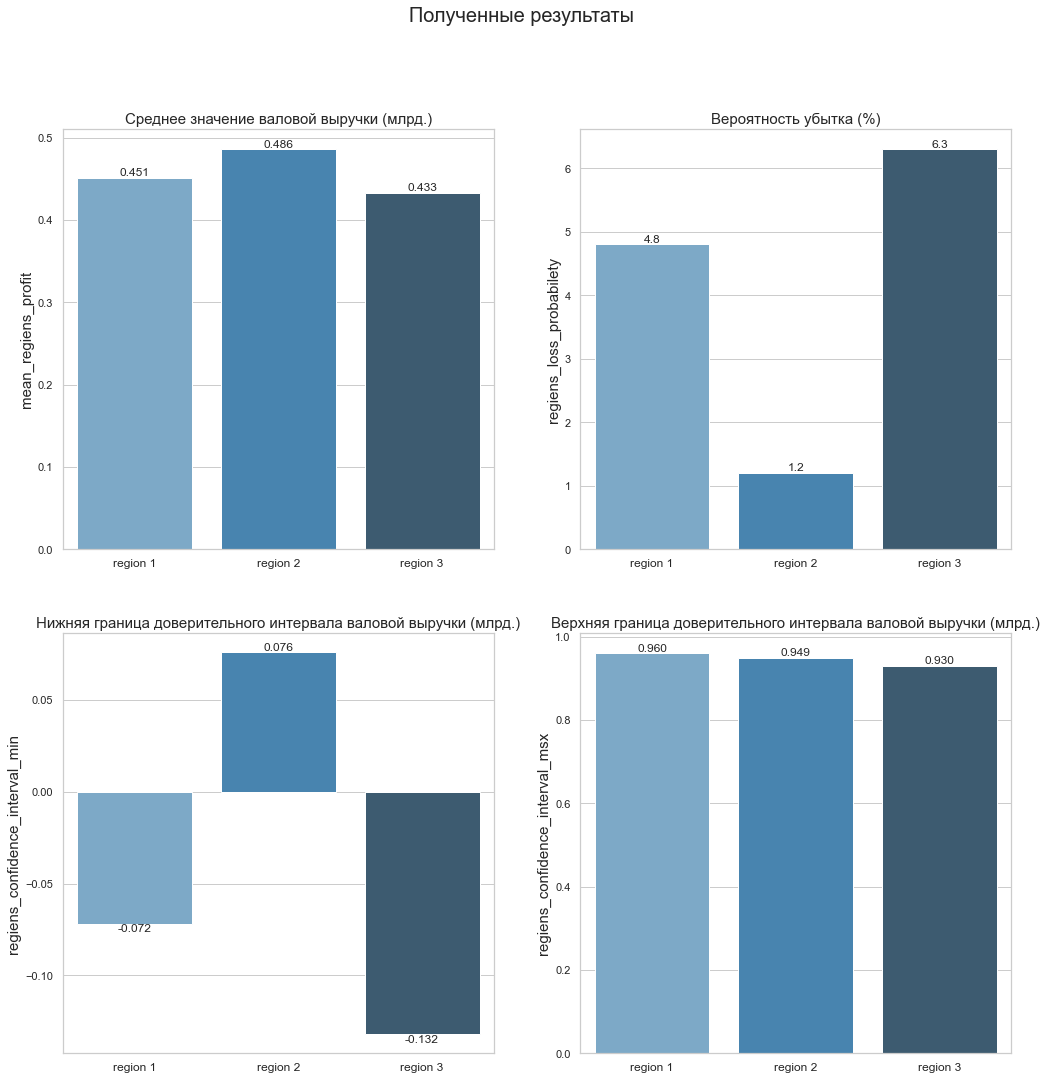

In [133]:
fig, axis = plt.subplots(2, 2, figsize=(17, 17))

#настройка шрифтов на графиках
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=13)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('figure', titlesize=20)  # fontsize of the figure title

# построение столбчатых диаграмм
sns.barplot(x=results.index, y=results['mean_regiens_profit'], ax=axis[0][0], palette="Blues_d")
sns.barplot(x=results.index, y=results['regiens_loss_probabilety'], ax=axis[0][1] , palette="Blues_d")
sns.barplot(x=results.index, y=results['regiens_confidence_interval_min'], ax=axis[1][0], palette="Blues_d")
sns.barplot(x=results.index, y=results['regiens_confidence_interval_msx'], ax=axis[1][1], palette="Blues_d")

# добавление дополнительной информации на графики
fig.suptitle('Полученные результаты')
axis[0][0].bar_label(axis[0][0].containers[0], fmt='%.3f')
axis[0][1].bar_label(axis[0][1].containers[0], fmt='%.1f')
axis[1][0].bar_label(axis[1][0].containers[0], fmt='%.3f')
axis[1][1].bar_label(axis[1][1].containers[0], fmt='%.3f')

axis[0][0].set_title('Среднее значение валовой выручки (млрд.)')
axis[0][1].set_title('Вероятность убытка (%)')
axis[1][0].set_title('Нижняя граница доверительного интервала валовой выручки (млрд.)')
axis[1][1].set_title('Верхняя граница доверительного интервала валовой выручки (млрд.)')
plt.show()

#### 4.2.5 Вывод:
По условию задания нужно отбросить регионы, у которых вероятность убытка более 2,5%. По результатам исследования обнаружено, что значения вероятности убытка в первый и третий регион превышают допустимый предел. 

* Максимальную вероятность убытка имеет третий регион в 6.3%.
* Минимальную вероятность убытка имеет второй регион в 1.2 %.

Самый большой диапазон доверительного интервала валовой прибыли у второго региона от 0.076 до 0.949 млрд.

Из вышеперечисленного можно сделать вывод, что наилучшем для разработки сырья регионом является второй регион, так как он имеет наименьшую вероятность убытка, наибольший доверительный диапазон возможной прибыли и наименьшую стандартную ошибку предсказанных ML-моделью объемов сырья.

## 5. Итоговый вывод

В результате исследования объемов нефтяного сырья в трех регионах была проделана следующая работа:

* Проведено предварительный анализ данных о регионах;
* Для каждого региона построены ML-модели линейной регресси и на валидационной выборке предсказаны объёмы сырья в данном регионе;
* Проведен расчет минимальное необходимого запаса сырья в скважине его сравнение с предсказанными средними значениями запасов скважин первого, второго и третьего регионов;
* Проведены расчеты суммарных объемы 200 лучших скважен в каждом регионе. Найдены суммарные прибыли, валовый доход и валовая маржинальность для этих регионов. Построены графики получены значений;
* Для регионов с помощью метода bootstrap получены доверительные интервалы и вероятности убытка.

Из проделанной работы получены следующие выводы: 

* Наибольшее значение среднего запас сырья имеет третий регион равное 95.042 тыс. баррелей;
* Наибольшее отношение среднего запаса сырья скважин к минимальному необходимому запасу имеет третий равный 0.855;
* При рассмотрении 200 скважин с наибольшим объемом сырья наибольший объем сырья и наибольший валовый доход имеет первый регион.
* Минимальную вероятность убытка в 1.2 % и самый большой диапазон доверительного интервала валовой прибыли от 0.076 до 0.949 млрд. имеет второй регион.


По итогу исследования для разработки скважен нефтяного сырья рекомендуется выбрать второй регион, так как только данный регион удовлетворяет требованиям по допустимым значениям вероятности убытка.